### Setup

In [1]:
using Pkg

# Pkg.add(url="https://github.com/mppmu/BoostFractor.jl.git")
# Pkg.add(url="https://github.com/bergermann/Dragoon.jl.git")
Pkg.update()

    Updating git-repo `https://github.com/bergermann/Dragoon.jl.git`


   Resolving package versions...


    Updating `C:\Users\bergermann\.julia\environments\v1.9\Project.toml`
  [2528b1d8] ~ Dragoon v0.0.0 `https://github.com/bergermann/Dragoon.jl.git#main` ⇒ v0.0.0 `https://github.com/bergermann/Dragoon.jl.git#main`
    Updating `C:\Users\bergermann\.julia\environments\v1.9\Manifest.toml`


  [2528b1d8] ~ Dragoon v0.0.0 `https://github.com/bergermann/Dragoon.jl.git#main` ⇒ v0.0.0 `https://github.com/bergermann/Dragoon.jl.git#main`


Precompiling project...

  ✓ Dragoon
  1 dependency successfully precompiled in 15 seconds. 151 already precompiled.

    Updating registry at `C:\Users\bergermann\.julia\registries\General.toml`
    Updating git-repo `https://github.com/mppmu/BoostFractor.jl.git`


    Updating git-repo `https://github.com/bergermann/Dragoon.jl.git`


  No Changes to `C:\Users\bergermann\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\bergermann\.julia\environments\v1.9\Manifest.toml`


In [2]:
using Dragoon
using Plots

In [3]:
#number of discs in the booster
n = 20

#initial disc configuration
#findpeak tries to find an equidistant configuration with a peak at f
initdist = findpeak(22.025e9,n)

#generate frequencies for calculation and for plotting
freqs = genFreqs(22.025e9,50e6; length=10) #optimize on these frequencies
freqsplot = genFreqs(22.025e9,150e6; length=1000)

#initialize physical properties of the booster
booster = AnalyticalBooster(initdist)
#=
Booster(
    pos,              disc positions
    ndisk,            disc number
    thickness,        disc thickness
    epsilon,          disc epsilon
    vmotor,           motor speed
    maxlength,        maximum allowed booster length (not implemented yet)
    timestamp,        booster operation time
    summedtraveltime, summed motor operation time
    codetimestamp     code runtime
)
=#

#initialize storage of measurements
hist = initHist(booster,10000,freqs,ObjAnalytical)
#                           ^ length, should be at least the larger of (n^2, search steps)
;

Objective Value: -243.3, Timestamp: 2023-06-19T09:25:23.957


### Optimizer

In [4]:
#=
how to use

linesearch(                     directly modifies booster.pos
    booster,                    
    hist,                       
    freqs,                      frequency range to optimize on
    α,                          base step length e.g. motorspeed*measurementfrequency
    (objective,[options]),      objective function
    (solver,[options]),         provides step direction p
    (derivative,[options]),     provides derivatives for use by solver
    (step,[options]),           calculates steplength
    (search,[options]),         search mode
    (unstuckinator,[options]);  tries to unstuck system from bad local minima
    ϵgrad=0,                    terminate if norm(gradient) falls below this value,
    maxiter=100,                maximum allowed iterations,
    showtrace=false,            wether to print progress,
    showevery=1,                only print every i iterations,
    unstuckisiter=true          wether an unstucking iteration counts towards maxiter
                                    warning! can run endlessly if false
)

returns trace, access with
trace[iteration].x      disc position
                .obj    objective value
                .g      gradient
                .h      hessian
                .t      timestamp
                .T      summed travel time
=#

In [5]:
trace = linesearch(booster,hist,freqs,booster.vmotor*1e-3,
                    ObjAnalytical,
                    SolverNewton("inv"),
                    Derivator2(1e-5,1e-6,"double"),
                    StepNorm("unit"),
                    SearchExtendedSteps(2000),
                    UnstuckDont;
                    ϵgrad=0.,maxiter=Int(2e1),showtrace=true);

20-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

20-element Vector{Float64}:
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN

Gradient norm: 4.69e6


InexactError: InexactError: trunc(Int64, NaN)

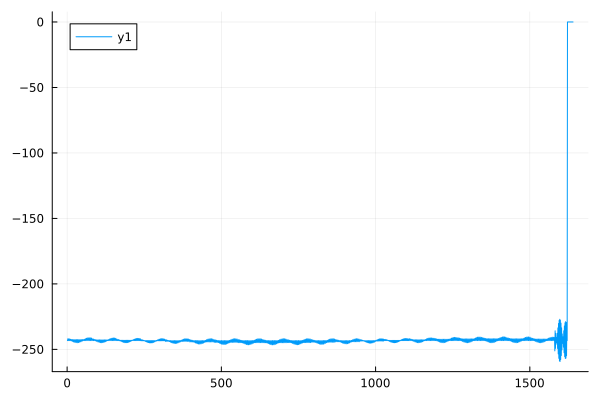

In [6]:
plot([hist[i].objvalue for i in 1:(4*20^2+2*20)])

In [7]:
booster.timestamp

0000-01-01T00:00:22.100

In [8]:
Dragoon.move(booster,1e-3*ones(20); additive=true)

In [9]:
#obtain result, booster is now in optimized position
#pos2dist(booster.pos)     #in distance space
booster.pos               #in position space

20-element Vector{Float64}:
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN

In [10]:
#get handy output
plt = analyse(hist,trace,freqsplot; freqs=freqs,div=10)

#savefig(plt[i],"cool_epic_result_wow.svg")

UndefVarError: UndefVarError: `trace` not defined